In [9]:
DF_PATH = "../data/processed/1_processed_df.pkl"
ROLES_PATH = "../data/raw/roles_short_names.csv" 
FIG_DIR = "../reports/figures"

NA_STRING = 'Not Specified'
TRANSPARENT_STRING = 'rgba(0, 0, 0, 0)'

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',
                  'DatabaseWorkedWith',
                  'WebframeWorkedWith',
                  'MiscTechWorkedWith',]

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import os

import plotly 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.figure_factory as ff

from sklearn.manifold import TSNE
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AgglomerativeClustering

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

## Read data and preprocess

In [5]:
raw_df = pd.read_pickle(DF_PATH)
raw_df.shape

(64461, 61)

In [6]:
role_names = pd.read_csv(ROLES_PATH,sep=";")

In [7]:
role_names

,Original name,Short name
0,"Developer, back-end",Back-end dev
1,"Developer, full-stack",Full-stack dev
2,"Developer, front-end",Front-end dev
3,"Developer, desktop or enterprise applications",Desktop dev
4,"Developer, mobile",Mobile dev
5,DevOps specialist,DevOps
6,Database administrator,Database admin
7,Designer,Designer
8,System administrator,System admin
9,"Developer, embedded applications or devices",Embedded dev


## oneh hot encoding

In [12]:
df = raw_df.copy()
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    #Multi-label classification (items can have multiple tags) #One-hot encoding for lists
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(df[col]),
                             columns = binarizer.classes_,
                            index= df[col].index)
    encoded_dfs [col]= encoded_df

In [26]:
encoded_dfs

{'DevType':        Academic researcher  Data or business analyst  \
 0                        0                         0   
 1                        0                         0   
 2                        0                         0   
 3                        0                         0   
 4                        0                         0   
 ...                    ...                       ...   
 64456                    0                         0   
 64457                    0                         0   
 64458                    0                         0   
 64459                    0                         0   
 64460                    0                         0   
 
        Data scientist or machine learning specialist  Database administrator  \
 0                                                  0                       0   
 1                                                  0                       0   
 2                                                  0       

In [16]:
# pd.DataFrame(encoded_dfs)
raw_df[ROLE_COLS + TECH_COLS]

,DevType,LanguageWorkedWith,DatabaseWorkedWith,WebframeWorkedWith,MiscTechWorkedWith
0,"[Developer, desktop or enterprise applications...","[C#, HTML/CSS, JavaScript]","[Elasticsearch, Microsoft SQL Server, Oracle]","[ASP.NET, ASP.NET Core]","[.NET, .NET Core]"
1,"[Developer, full-stack, Developer, mobile]","[JavaScript, Swift]",[],[],[React Native]
2,[],"[Objective-C, Python, Swift]",[],[],[]
3,[],[],[],[],[]
4,[],"[HTML/CSS, Ruby, SQL]","[MySQL, PostgreSQL, Redis, SQLite]",[Ruby on Rails],[Ansible]
...,...,...,...,...,...
64456,[Senior executive/VP],[],[],[],[]
64457,[],"[Assembly, Bash/Shell/PowerShell, C, C#, C++, ...","[Cassandra, Couchbase, DynamoDB, Elasticsearch...",[],[]
64458,[],[],[],[],[]
64459,[],[HTML/CSS],[Oracle],[],[]


In [19]:
#merge one hot encoded
df = pd.concat(encoded_dfs, axis=1)

In [21]:
df

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
64456                   0                        0   
64457                   0                        0   
64458                   0                        0   
64459                   0                        0   
64460                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
64456                                             0                      0   
64457                                             0                      0   
64458                                             0                      0   
64459                                             0                      0   
64460                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
64456        0                 0                     0                   0   
64457        0                 0                     0                   0   
64458        0                 0                     0                   0   
64459        0                 0                     0                   0   
64460        0                 0                     0                   0   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
64456                                             0   
64457                                             0   
64458                                             0   
64459                                             0   
64460                                             0   

                                                   ... MiscTechWorkedWith  \
      Developer, embedded applications or devices  ...            Node.js   
0                                               0  ...                  0   
1                                               0  ...                  0   
2                                               0  ...                  0   
3                                               0  ...                  0   
4                                               0  ...                  0   
...                           

## Displays Skills Frequency

In [25]:
df.columns.unique().tolist()

[('DevType', 'Academic researcher'),
 ('DevType', 'Data or business analyst'),
 ('DevType', 'Data scientist or machine learning specialist'),
 ('DevType', 'Database administrator'),
 ('DevType', 'Designer'),
 ('DevType', 'DevOps specialist'),
 ('DevType', 'Developer, QA or test'),
 ('DevType', 'Developer, back-end'),
 ('DevType', 'Developer, desktop or enterprise applications'),
 ('DevType', 'Developer, embedded applications or devices'),
 ('DevType', 'Developer, front-end'),
 ('DevType', 'Developer, full-stack'),
 ('DevType', 'Developer, game or graphics'),
 ('DevType', 'Developer, mobile'),
 ('DevType', 'Educator'),
 ('DevType', 'Engineer, data'),
 ('DevType', 'Engineer, site reliability'),
 ('DevType', 'Engineering manager'),
 ('DevType', 'Marketing or sales professional'),
 ('DevType', 'Product manager'),
 ('DevType', 'Scientist'),
 ('DevType', 'Senior executive/VP'),
 ('DevType', 'System administrator'),
 ('LanguageWorkedWith', 'Assembly'),
 ('LanguageWorkedWith', 'Bash/Shell/Powe

In [27]:
# calculate the sum of all columns except devtypes
skill_freq = df.drop("DevType",axis = 1).sum().reset_index() #.reset_index() #Converts the Series to a DataFrame and moves the index (skill names) to a column:
skill_freq.columns = ["group","skill","freq"]
# 1. df.drop("DevType", axis=1)
# Drops ALL columns where Level 0 == "DevType"
# Keeps only: LanguageWorkedWith, DatabaseWorkedWith, WebframeWorkedWith, MiscTechWorkedWith

# 2. .sum()
# Sums each column (counts how many developers use each skill)
# Returns a Series with MultiIndex

# 3. .reset_index()
# Converts MultiIndex to columns, creating 3 columns:
# - Level 0 becomes first column ('group')
# - Level 1 becomes second column ('skill')  
# - The sum values become third column (0)

# 4. .columns = ["group", "skill", "freq"]
# Renames the 3 columns appropriately

In [28]:
skill_freq

,group,skill,freq
0,LanguageWorkedWith,Assembly,3553
1,LanguageWorkedWith,Bash/Shell/PowerShell,18980
2,LanguageWorkedWith,C,12487
3,LanguageWorkedWith,C#,18041
4,LanguageWorkedWith,C++,13707
...,...,...,...
69,MiscTechWorkedWith,Teraform,2518
70,MiscTechWorkedWith,Torch/PyTorch,1872
71,MiscTechWorkedWith,Unity 3D,4413
72,MiscTechWorkedWith,Unreal Engine,1316


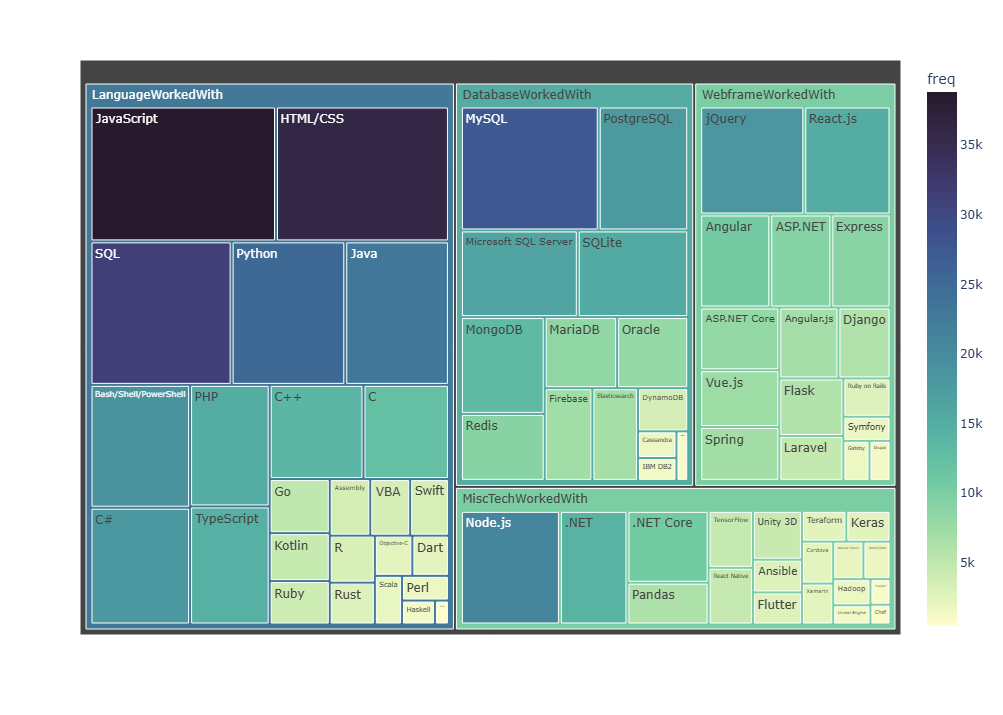

In [30]:
fig = px.treemap(skill_freq, 
                 path=['group', 'skill'], 
                 color_continuous_scale='deep',
                 values='freq',color='freq')

fig.update_layout(width=1400, height=700)
fig.show()

fig.write_html(os.path.join(FIG_DIR, 'treemap_skills_freq.html'))

## Create Jobs & Skills Heatmap

In [36]:
jobs_freq = df["DevType"].sum().sort_values(ascending=False).reset_index()
jobs_freq

,index,0
0,"Developer, back-end",27228
1,"Developer, full-stack",27125
2,"Developer, front-end",18296
3,"Developer, desktop or enterprise applications",11784
4,"Developer, mobile",9482
5,DevOps specialist,5969
6,Database administrator,5722
7,Designer,5321
8,System administrator,5242
9,"Developer, embedded applications or devices",4750


In [37]:
sorted_roles = df["DevType"].sum().sort_values().index.tolist()
sorted_skills = df.drop("DevType",axis = 1).sum().sort_values(ascending=False).droplevel(level=0).index.tolist()

In [40]:
skills = []

# For each role, calculate the percentage of each skill
for role in sorted_roles:
    # Filter for the role
    role_mask = (df[('DevType', role)] == 1)

    #For each skill column, calculate mean of the one-hot-encoded -> percentage
    skills_role = pd.concat({tech_col: df.loc[role_mask, tech_col].mean() * 100
                             for tech_col in TECH_COLS})

    # Append to original list
    skills.append(skills_role)

# Concat and format
skills = pd.concat(skills, axis=1)
skills.columns = sorted_roles
skills = skills.reset_index(level=0, drop=True)
skills = skills.loc[sorted_skills]
skills = skills.T

In [41]:
skills

,JavaScript,HTML/CSS,SQL,MySQL,Python,Java,Node.js,Bash/Shell/PowerShell,jQuery,C#,...,Gatsby,Cassandra,IBM DB2,Drupal,Unreal Engine,Haskell,Puppet,Couchbase,Chef,Julia
Marketing or sales professional,71.028037,76.635514,57.788162,61.370717,38.629283,32.242991,41.744548,31.152648,45.482866,25.700935,...,9.034268,5.919003,5.763240,9.968847,6.853583,4.205607,4.517134,6.230530,4.672897,4.049844
Senior executive/VP,72.878788,69.166667,65.075758,49.545455,45.984848,33.333333,43.787879,44.393939,36.439394,34.848485,...,5.227273,6.590909,5.227273,6.060606,4.318182,3.409091,4.848485,5.227273,3.939394,2.727273
"Engineer, site reliability",65.876289,58.505155,61.701031,53.762887,59.896907,39.948454,42.628866,61.494845,30.979381,26.134021,...,4.896907,8.865979,3.711340,5.206186,3.144330,3.969072,9.278351,3.659794,8.041237,2.010309
Scientist,48.465964,47.027804,43.672100,39.213806,67.689358,32.981783,25.982742,42.425695,25.071908,22.339406,...,2.924257,4.122723,3.499521,3.691275,4.026846,4.554171,2.301055,3.259827,2.157239,5.465005
Product manager,73.007609,69.603524,63.115739,52.422907,42.010412,36.283540,42.571085,37.484982,41.529836,34.521426,...,4.805767,4.325190,3.924710,5.246296,3.203845,2.282739,3.003604,3.123748,2.643172,1.561874
Engineering manager,69.346549,60.682819,60.425844,47.099853,46.512482,37.995595,43.465492,45.888399,30.837004,33.333333,...,4.809104,6.461087,3.817915,4.662261,2.679883,2.679883,4.515419,4.001468,4.331865,1.578561
"Developer, game or graphics",67.228397,62.459663,49.264970,48.045895,43.850843,41.376838,41.233417,35.353173,34.313374,53.531732,...,3.728935,2.653281,2.617426,3.657225,16.098960,3.155253,2.402295,3.011832,2.007888,1.398351
Educator,68.408470,66.803279,56.625683,53.859290,45.252732,39.993169,39.583333,38.183060,37.363388,29.576503,...,4.474044,3.517760,3.790984,4.678962,3.381148,4.200820,2.834699,2.766393,2.288251,2.185792
Academic researcher,54.194820,53.462838,46.706081,47.015766,59.037162,39.864865,28.293919,36.768018,29.898649,24.239865,...,2.533784,3.800676,3.040541,3.293919,2.956081,4.504505,2.111486,2.505631,1.520270,4.335586
"Engineer, data",56.902087,52.594971,67.174960,49.678973,65.088283,40.449438,31.942215,43.900482,29.507758,26.645265,...,2.782236,7.490637,4.333868,3.210273,2.701980,2.835741,2.808989,3.504548,2.354200,2.247191


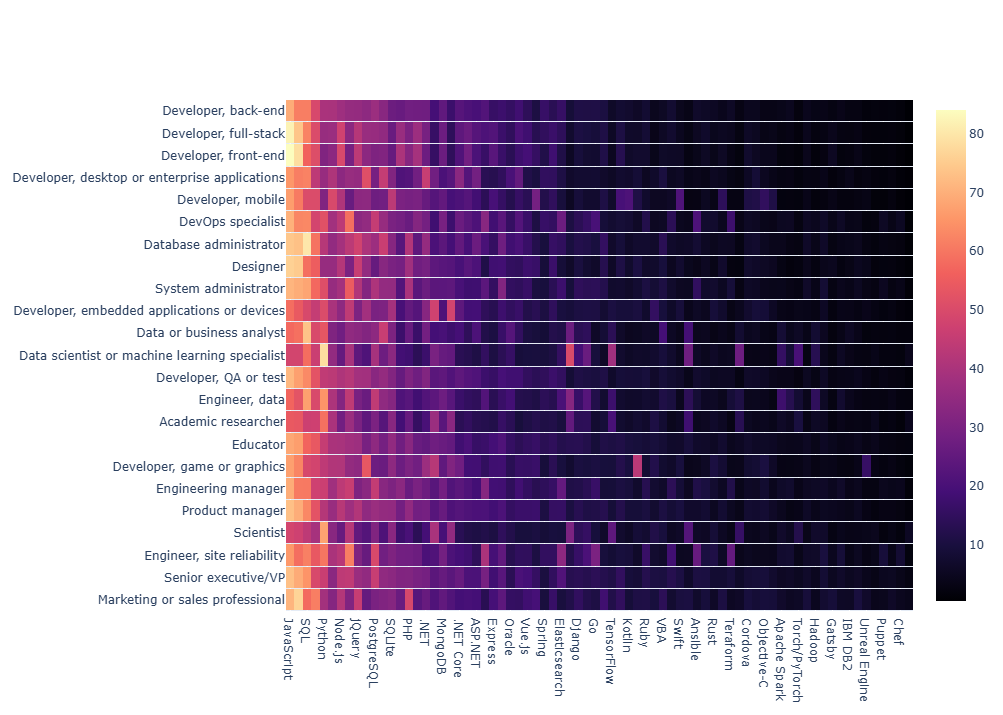

In [42]:

fig = go.Figure(data=go.Heatmap(z=skills, x=skills.columns,y=skills.index, colorscale='magma', ygap=1))
fig.update_layout(width=2500, height=700)
fig.show()
fig.write_html(os.path.join(FIG_DIR, 'heatmap.html'))